# Lecture9. Ensemble model(Random forest & XGBoost)

@ Date: 2021-04-26 <br>
@ Author: haejiko@gmail.com

#### - 목차 -

[1. Decision Tree and Random Forest](#1.-Decision-Tree-and-Random-Forest)  
>[1.1 데이터 전처리(Preprocessing)](#1.1-데이터-전처리(Preprocessing))  
>[1.2 결측치 데이터 제거(no imputation)](#1.2-결측치-데이터-제거(no-imputation))  
>[1.3 데이터 나누기 (training, test dataset)](#1.3-데이터-나누기-(training,-test-dataset))  
>[1.4 Decision Tree Model](#1.4-Decision-Tree-Model)  
>[1.5 Random forest model](#1.5-Random-forest-model)  
>[1.6 Random forets의 예측 정확도(Prediction Accuracy)](#1.6-Random-forets의-예측-정확도(Prediction-Accuracy))  
>    >[1.6.1 변수 중요성(Variable importance)](#1.6.1-변수-중요성(Variable-importance)) 

[2. Boosting model](#2.-Boosting-model)  
>[2.1 Boosting model의 예측 정확도(Prediction Accuracy)](#2.1-Boosting-model의-예측-정확도(Prediction-Accuracy))  
>    >[2.1.1 변수 중요성 (Variable importance)](#2.1.1-변수-중요성-(Variable-importance))

## 1. Decision Tree and Random Forest

#### 데이터 로드

In [44]:
import pandas as pd

url="https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv"
data = pd.read_csv(url)

C:\Users\tjdwl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1.1 데이터 전처리(Preprocessing)

In [45]:
data.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

In [46]:
data = data.rename(columns={"Unnamed: 0" : "observationld"}) # 특정 column 이름 변경

## 1.2 결측치 데이터 제거(no imputation)

<AxesSubplot:>

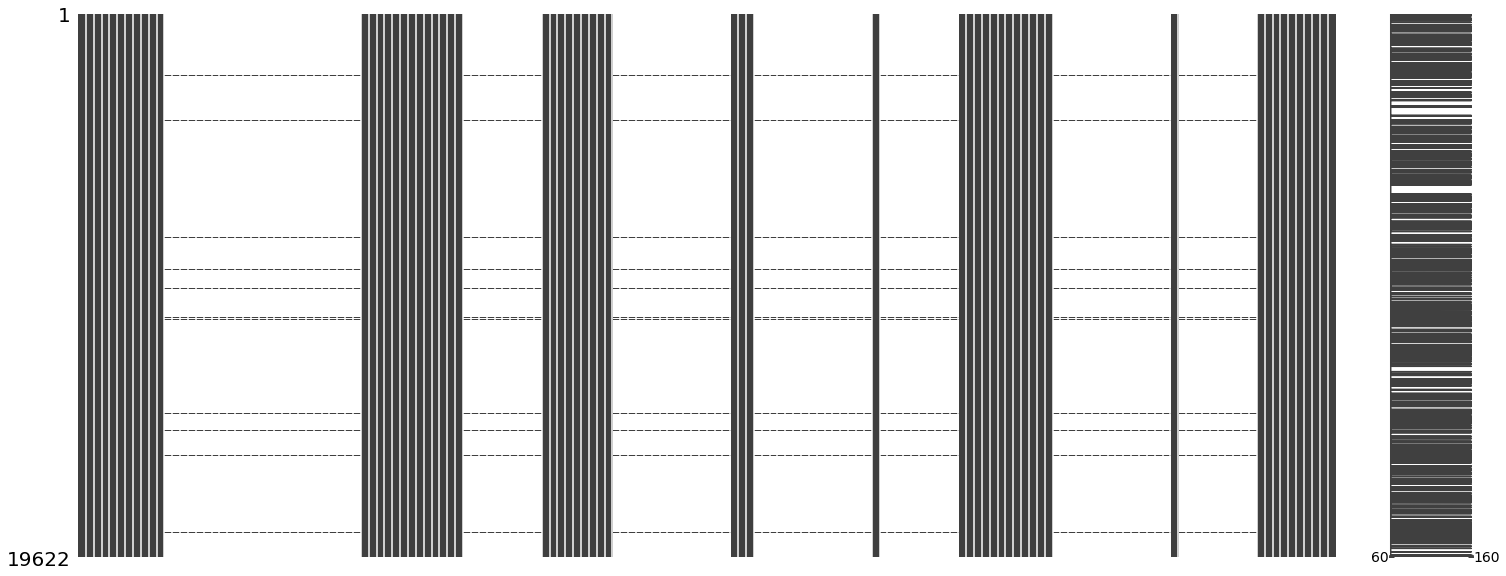

In [47]:
# 결측치 값을 갖는 columns 선별

import missingno as msno

msno.matrix(data)

특정 열들은 결측치가 너무 많으므로 결측치가 있는 열은 전부 제거

<AxesSubplot:>

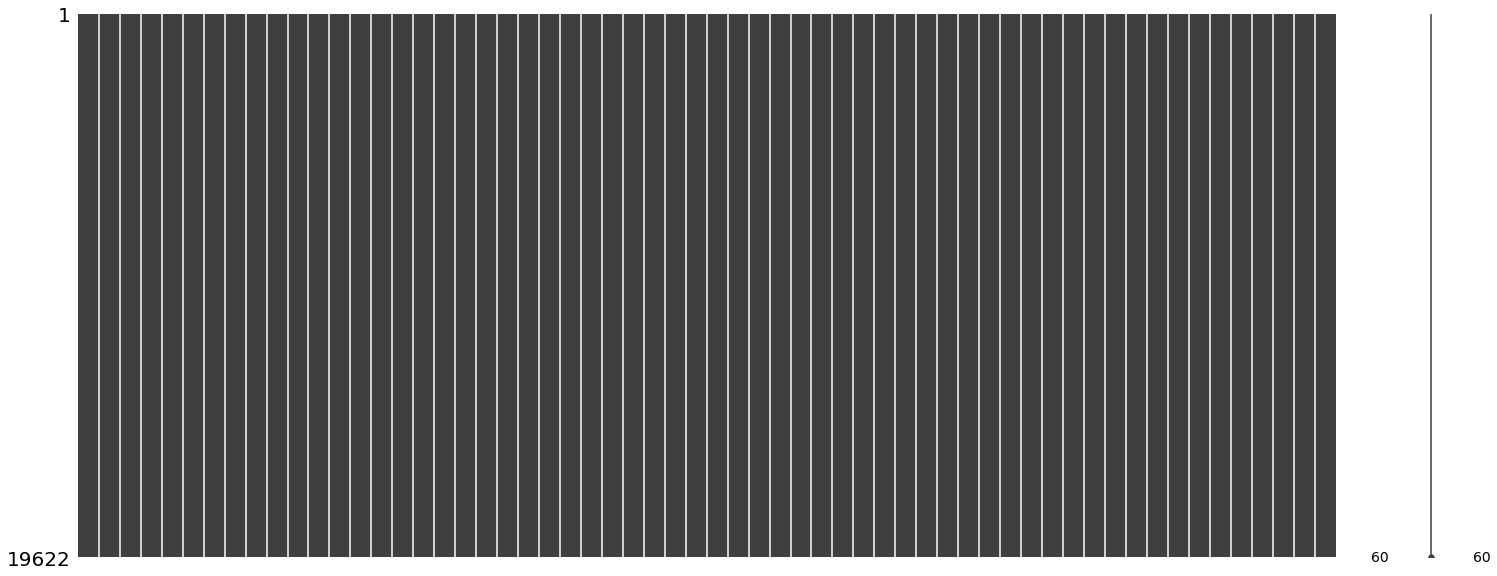

In [48]:
data = data.dropna(axis=1) # axis=0이면 결측치 있는 row들 전부 제거 , axis=1이면 결측치 있는 col 모두 제거
msno.matrix(data)

In [49]:
# 결측치 없는 잔여 columns
data.columns

Index(['observationld', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyro

In [50]:
data

,observationld,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,19618,adelmo,1322832937,588376,02/12/2011 13:35,no,864,147.00,-34.80,129.0,...,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0,E
19618,19619,adelmo,1322832937,596287,02/12/2011 13:35,no,864,145.00,-35.30,130.0,...,1.59,-1.36,0.00,-271,-91,-43,-151,-635.0,-36.0,E
19619,19620,adelmo,1322832937,636283,02/12/2011 13:35,no,864,145.00,-35.50,130.0,...,1.54,-1.20,0.05,-263,-99,-45,-116,-654.0,-70.0,E
19620,19621,adelmo,1322832937,964299,02/12/2011 13:35,no,864,143.00,-35.90,131.0,...,1.48,-0.90,0.05,-270,-141,-51,-68,-678.0,-98.0,E


## 1.3 데이터 나누기 (training, test dataset)

In [51]:
from sklearn.model_selection import train_test_split
# train_test_split이란? 전체 데이터셋 배열을 받아서 랜덤하게 훈련/테스트 데이터 셋으로 분리해주는 함수

x_train, x_test, y_train, y_test = train_test_split(data, data["classe"], test_size=0.3, random_state=123)

In [52]:
x_train.columns[7:29][:]

Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y'],
      dtype='object')

In [53]:
# training할 때 사용할 feature들만 추출(8번쩨~ 30번째 feature들 사용)
x_train = x_train[x_train.columns[7:29]]
x_test = x_test[x_test.columns[7:29]]

## 1.4 Decision Tree Model

In [54]:
# sklearn 모듈의 tree import
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3, random_state=2021)
clf = clf.fit(x_train, y_train)

In [55]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.39


In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("      Confusion_matrix")
print("")
print(confusion_matrix(y_pred, y_test))
print("")
print("")
print(classification_report(y_pred, y_test))

      Confusion_matrix

[[ 794   84   81   28   19]
 [ 835 1020  943  897  562]
 [  35   46   37   26   15]
 [   0    0    0    0    0]
 [   0    0    0    0  465]]


              precision    recall  f1-score   support

           A       0.48      0.79      0.59      1006
           B       0.89      0.24      0.38      4257
           C       0.03      0.23      0.06       159
           D       0.00      0.00      0.00         0
           E       0.44      1.00      0.61       465

    accuracy                           0.39      5887
   macro avg       0.37      0.45      0.33      5887
weighted avg       0.76      0.39      0.42      5887



C:\Users\tjdwl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.5 Random forest model

In [60]:
# RF 모델 구축
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5)

# 학습 진행
forest.fit(x_train, y_train)

# 예측
y_pred = forest.predict(x_test)

## 1.6 Random forets의 예측 정확도(Prediction Accuracy)

In [61]:
print("      Confusion_matrix")
print("")
print(confusion_matrix(y_pred, y_test))
print("")
print("")
print(classification_report(y_pred, y_test))

      Confusion_matrix

[[1599   48   44   30   17]
 [  18 1058   63    6   15]
 [  20   34  930   33    6]
 [  18    9   21  878    5]
 [   9    1    3    4 1018]]


              precision    recall  f1-score   support

           A       0.96      0.92      0.94      1738
           B       0.92      0.91      0.92      1160
           C       0.88      0.91      0.89      1023
           D       0.92      0.94      0.93       931
           E       0.96      0.98      0.97      1035

    accuracy                           0.93      5887
   macro avg       0.93      0.93      0.93      5887
weighted avg       0.93      0.93      0.93      5887



In [62]:
x_train

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y
19258,5.27,-3.36,-80.40,3,0.19,0.02,0.03,9,15,25,...,-406,0.00,0.0,0.00,29,3.61,-1.96,0.51,48,83
14623,1.13,3.37,-87.60,4,-0.03,-0.02,-0.05,-12,6,39,...,-322,0.00,0.0,0.00,15,2.04,-0.80,-0.02,24,131
16361,-2.35,8.53,-92.50,1,0.29,-0.03,-0.57,-10,3,6,...,-327,74.00,-52.2,7.06,19,-2.71,0.92,-0.07,68,19
11606,127.00,-41.60,162.00,18,0.08,0.11,-0.20,48,46,-163,...,-316,-8.57,37.5,-83.60,28,0.34,-0.48,0.67,-272,-31
8273,116.00,17.10,-4.93,17,0.10,0.13,-0.25,-21,63,-158,...,-307,-49.60,31.7,-97.00,29,1.61,-0.93,0.97,-287,-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,120.00,15.90,-0.86,19,0.08,0.10,-0.15,-22,65,-169,...,-336,-40.00,-16.8,-34.60,9,1.70,-0.96,0.74,32,-76
7763,119.00,-51.80,-174.00,17,0.03,0.16,-0.15,41,41,-160,...,-364,28.20,61.2,-17.00,28,0.85,-0.93,0.62,-271,-18
15377,119.00,15.50,0.37,18,0.13,0.11,-0.13,-21,63,-162,...,-336,-45.30,33.0,-101.00,30,-0.19,-0.24,0.46,-283,-65
17730,1.93,4.22,-88.20,2,-0.06,0.02,-0.03,-8,3,21,...,-422,100.00,-32.4,-6.69,20,-4.05,1.20,-0.08,103,109


### 1.6.1 변수 중요성(Variable importance)

특성 중요도 : 
[0.13922249 0.10344135 0.10287986 0.01236446 0.01906075 0.01137914
 0.02920019 0.02490899 0.02309498 0.06259467 0.04314805 0.03766784
 0.04164247 0.05561857 0.04204777 0.04319238 0.02973983 0.03487548
 0.03191406 0.01711037 0.05431933 0.04057698]


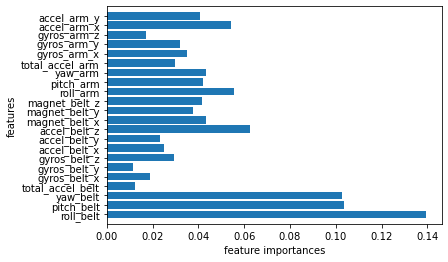

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
    plt.show()

# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

# 특성 중요도 시각화 하기
plot_feature_importances_cancer(forest)

<font color=blue><b>* 위의 변수에 대한 설명을 한번 보세요. 강의 시 얘기했던대로, 모든 관측치에 대해서 평균적으로 가장 중요하게 쓰인 변수는 무엇인지, 그리고 top5 또는 top10을 뽑아봤을 때 어떠한 변수가 가장 의미가 있었는지 해석한다면, 여러분들의 데이터에 대해서 중요한 insight를 줄 수 있을겁니다.</b></font>

## 2. Boosting model

In [65]:
x_train[0:]

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y
19258,5.27,-3.36,-80.40,3,0.19,0.02,0.03,9,15,25,...,-406,0.00,0.0,0.00,29,3.61,-1.96,0.51,48,83
14623,1.13,3.37,-87.60,4,-0.03,-0.02,-0.05,-12,6,39,...,-322,0.00,0.0,0.00,15,2.04,-0.80,-0.02,24,131
16361,-2.35,8.53,-92.50,1,0.29,-0.03,-0.57,-10,3,6,...,-327,74.00,-52.2,7.06,19,-2.71,0.92,-0.07,68,19
11606,127.00,-41.60,162.00,18,0.08,0.11,-0.20,48,46,-163,...,-316,-8.57,37.5,-83.60,28,0.34,-0.48,0.67,-272,-31
8273,116.00,17.10,-4.93,17,0.10,0.13,-0.25,-21,63,-158,...,-307,-49.60,31.7,-97.00,29,1.61,-0.93,0.97,-287,-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,120.00,15.90,-0.86,19,0.08,0.10,-0.15,-22,65,-169,...,-336,-40.00,-16.8,-34.60,9,1.70,-0.96,0.74,32,-76
7763,119.00,-51.80,-174.00,17,0.03,0.16,-0.15,41,41,-160,...,-364,28.20,61.2,-17.00,28,0.85,-0.93,0.62,-271,-18
15377,119.00,15.50,0.37,18,0.13,0.11,-0.13,-21,63,-162,...,-336,-45.30,33.0,-101.00,30,-0.19,-0.24,0.46,-283,-65
17730,1.93,4.22,-88.20,2,-0.06,0.02,-0.03,-8,3,21,...,-422,100.00,-32.4,-6.69,20,-4.05,1.20,-0.08,103,109


In [66]:
# 모델 생성
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# 모델 훈련
xgb.fit(x_train, y_train) 

# 모델 예측
y_pred = xgb.predict(x_test)

C:\Users\tjdwl\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## 2.1 Boosting model의 예측 정확도(Prediction Accuracy)

In [67]:
print("      Confusion_matrix")
print("")
print(confusion_matrix(y_pred, y_test))
print("")
print("")
print(classification_report(y_pred, y_test))

      Confusion_matrix

[[1423   70   79   62   81]
 [  77 1008  205    8   30]
 [  37   50  697   38   15]
 [ 113   19   75  831   11]
 [  14    3    5   12  924]]


              precision    recall  f1-score   support

           A       0.86      0.83      0.84      1715
           B       0.88      0.76      0.81      1328
           C       0.66      0.83      0.73       837
           D       0.87      0.79      0.83      1049
           E       0.87      0.96      0.92       958

    accuracy                           0.83      5887
   macro avg       0.83      0.84      0.83      5887
weighted avg       0.84      0.83      0.83      5887



### 2.1.1 변수 중요성 (Variable importance)

특성 중요도 : 
[0.12055487 0.05713313 0.06570622 0.0519212  0.01796261 0.03894553
 0.0395476  0.01176658 0.02273075 0.0529844  0.05491853 0.03392816
 0.05803654 0.06049296 0.02814111 0.0511989  0.0288397  0.04183625
 0.0318652  0.00976977 0.08232535 0.03939462]


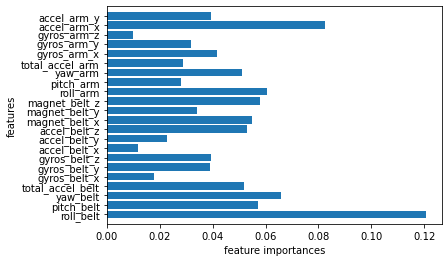

In [68]:
# 특성 중요도
print("특성 중요도 : \n{}".format(xgb.feature_importances_))

# 특성 중요도 시각화 하기1
plot_feature_importances_cancer(xgb)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

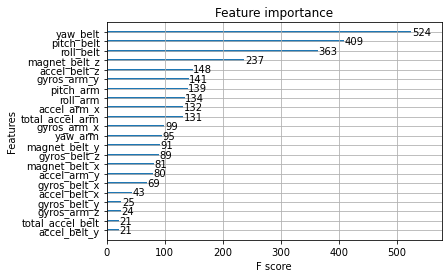

In [69]:
# 특성 중요도 시각화 하기2
from xgboost import plot_importance
plot_importance(xgb)

<font color=blue><b>* 중요 변수를 뽑아봤을 때, random forest에서의 순위와 별반 다를게 없는 것을 알 수 있습니다.<br>참고로, 앞에서는 OOB 값을 x axis로 활용했고 여기에서는 별도의 metric F measure로 표시하여 scale은 상대적으로 다르지만, 그것에 대한 의미는 없고 변수 간 상대적인 중요성에 집중하면 되겠습니다.</b></font>